In [1]:
import pandas as pd
from checkpoint import checkpoint
collisions = pd.read_csv("https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD")

In [2]:
%load_ext autoreload
%autoreload 2

In [60]:
checkpoint.enable()

In [4]:
len(collisions)

910980

In [5]:
collisions_ext = pd.concat([collisions[['DATE', 'LOCATION']], collisions[['DATE', 'LOCATION']]])

In [6]:
len(collisions_ext)

1821960

In [40]:
%time collisions_ext['DATE'][:100].map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:1000].map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:10000].map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:100000].map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:1000000].map(lambda d: pd.to_datetime(d))
pass

Wall time: 20 ms
Wall time: 194 ms
Wall time: 1.92 s
Wall time: 19.3 s
Wall time: 3min 16s


In [41]:
%time collisions_ext['DATE'][:100].safe_map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:1000].safe_map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:10000].safe_map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:100000].map(lambda d: pd.to_datetime(d))
%time collisions_ext['DATE'][:1000000].map(lambda d: pd.to_datetime(d))
pass

Wall time: 21 ms
Wall time: 196 ms
Wall time: 1.95 s
Wall time: 19.4 s
Wall time: 3min 14s


In [10]:
%time collisions_ext[['DATE', 'LOCATION']][:100].apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:1000].apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:10000].apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:100000].apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:1000000].apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
pass

Wall time: 65 ms
Wall time: 262 ms
Wall time: 2.26 s
Wall time: 22.1 s
Wall time: 3min 40s


In [22]:
%time collisions_ext[['DATE', 'LOCATION']][:100].safe_apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:1000].safe_apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:10000].safe_apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:100000].safe_apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
%time collisions_ext[['DATE', 'LOCATION']][:1000000].safe_apply(lambda srs: pd.to_datetime(srs['DATE']), axis='columns')
pass

Wall time: 62 ms
Wall time: 326 ms
Wall time: 2.84 s
Wall time: 28.3 s
Wall time: 4min 41s


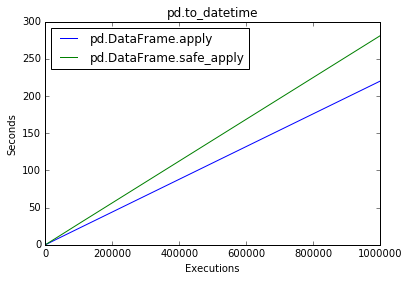

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


l1, = plt.plot([100, 1000, 10000, 100000, 1000000], [0.065, 0.262, 2.26, 22.1, 3*60+40], label='pd.DataFrame.apply')
l2, = plt.plot([100, 1000, 10000, 100000, 1000000], [0.062, 0.326, 2.84, 28.3, 4*60+41], label='pd.DataFrame.safe_apply')
# ax = plt.gca()
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.legend(handles=[l1, l2], loc=2)
plt.title("pd.to_datetime")
plt.xlabel("Executions")
plt.ylabel("Seconds")

(0, 300)

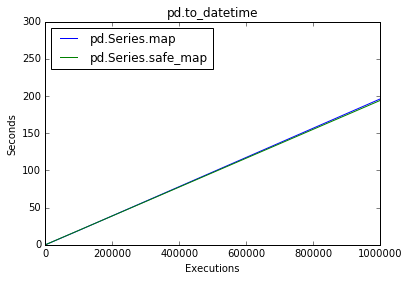

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline


l1, = plt.plot([100, 1000, 10000, 100000, 1000000], [0.020, 0.194, 1.92, 19.3, 3*60+16], label='pd.Series.map')
l2, = plt.plot([100, 1000, 10000, 100000, 1000000], [0.021, 0.196, 1.95, 19.4, 3*60+14], label='pd.Series.safe_map')
plt.legend(handles=[l1, l2], loc=2)
plt.title("pd.to_datetime")
plt.xlabel("Executions")
plt.ylabel("Seconds")
axes = plt.gca()
axes.set_ylim([0,300])